<h1 align= 'center'> Customer Segmentation </h1>


In [66]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [67]:
### Load and View the Data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
## Data Types
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [69]:
## Conversion of Object to Binary Data Type
df['Genre'] = np.where(df['Genre'] == 'Male', 0, 1)         ## Check Gender Specification in Pyhton....
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [70]:
## Are there any Missing Values
df.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

### Exploring each Features

In [71]:
## Checking if there are any Duplicates
df['CustomerID'].duplicated().any()

False

<AxesSubplot:xlabel='count', ylabel='Genre'>

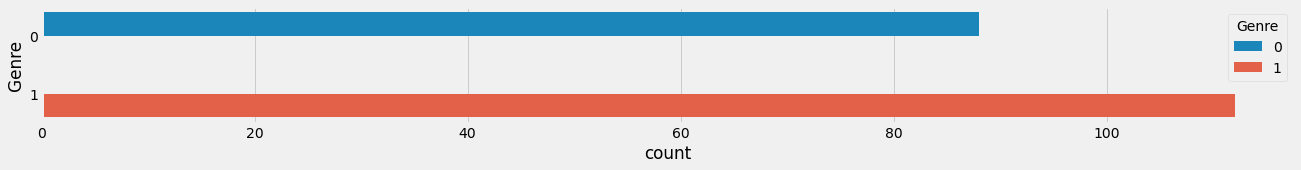

In [72]:
## Distribution of Males and Females
plt.figure(figsize=(20, 2))
sns.countplot(y= df['Genre'], hue= df['Genre'])

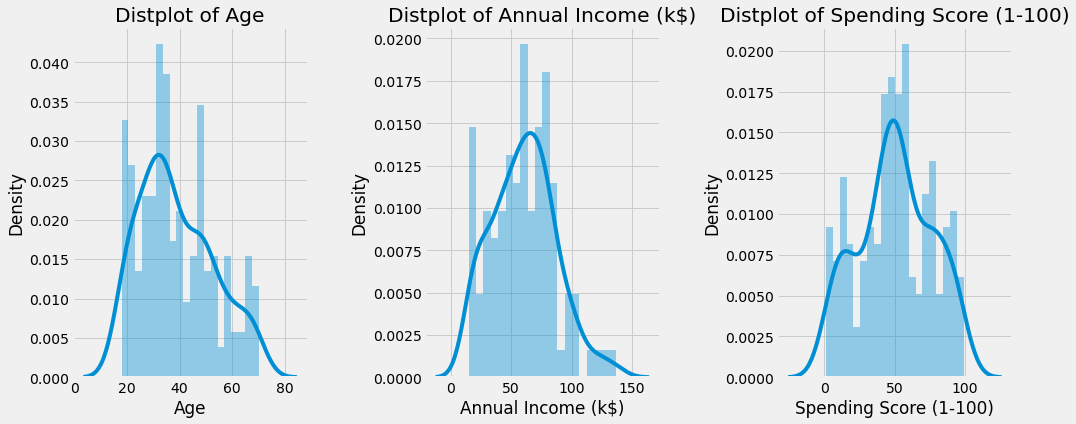

In [73]:
## Distribution of Age, Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 6))
count = 0 
for i in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    count += 1
    plt.subplot(130 + count)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[i] , bins = 20)
    plt.title('Distplot of {}'.format(i))
plt.show()

- We can see that the distriution is somewhat Normal.

### Correlation between parameteres

Also, we will analyze the correlation between the numeric parameters. For that aim, we'll use the pairplot seaborn function. We want to see whether there is a difference between gender. So, we are going to set the hue parameter to get different colors for points belonging to female or customers.

**K-Means assumes There is little or no correlation between the variables.**


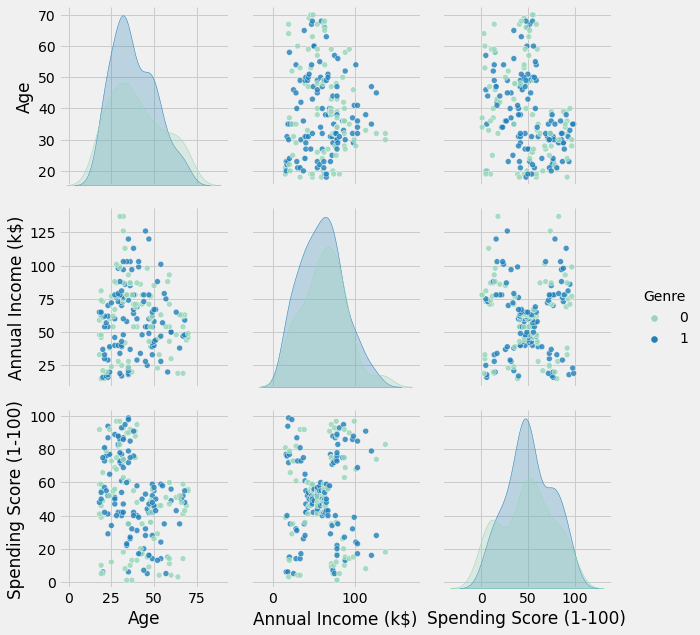

In [74]:
sns.pairplot(df, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
hue = "Genre", kind= "scatter", palette = "YlGnBu", height = 3, plot_kws={"s": 35, "alpha": 0.8})

### Dimensionality reduction

We can apply Principal Component Analysis (PCA) to discover which dimensions best maximize the variance of features involved.

In [75]:
from sklearn.decomposition import PCA

In [76]:
## Selecting Columns other than CustomerID
X = df.iloc[:, 1:]
X.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [77]:
# Apply PCA and fit the features selected
pca = PCA(n_components=2)

In [78]:
# Transform samples using the PCA fit
pca_2d = pca.fit_transform(X)

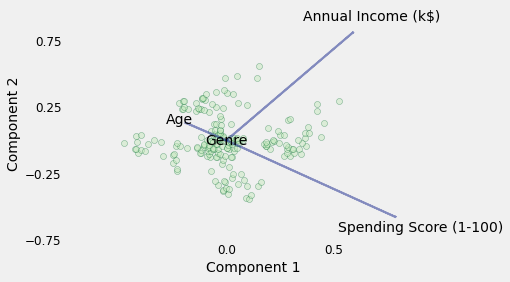

In [79]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley, color="#c7e9c0", edgecolor="#006d2c", alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='#253494',alpha=0.5,lw=2) 
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color="#000000", ha="center", va="center")
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color="#000000", ha="center", va="center")
    plt.xlim(-.75,1)
    plt.ylim(-0.5,1)
    plt.grid(False)
    plt.xticks(np.arange(0, 1, 0.5), size=12)
    plt.yticks(np.arange(-0.75, 1, 0.5), size=12)
    plt.xlabel("Component 1", size=14)
    plt.ylabel("Component 2", size=14)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

biplot(pca_2d[:,0:2], np.transpose(pca.components_[0:2, :]), labels=X.columns)

- We can observe that Annual Income as well as Spending Score at the two most important components.

**REFERENCE:** https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

### K-Means Clustering

In [80]:
from sklearn.cluster import KMeans

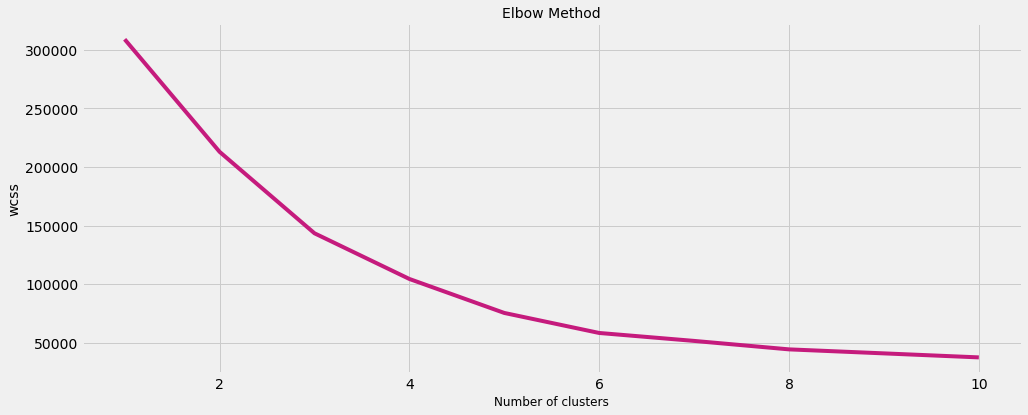

In [81]:
plt.figure(1 , figsize = (15 , 6))
wcss = []                   ### Within Cluster Sum of Squares
clusters = []               ### Number of Clusters

for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)      ### K-Means++ is a method of initializing the centroids
    kmeans.fit(X)                                                         ### Fitting the data to the model

    clusters.append(kmeans)
    wcss.append(kmeans.inertia_)                                            ### Appending the Within Cluster Sum of Squares to the list

## Plottinh the Elbow Plot
plt.plot(range(1,11), wcss, c="#c51b7d")
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show() 

- The point at which the elbow shape is created is 6, that is, our K value or an optimal number of clusters is 6.

#### Silhouette Score

- The Silhouette score is used to measure the degree of separation between clusters. This is for Validation Purpose

In [82]:
from sklearn.metrics import silhouette_score

for i in range(1,10,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(X, clusters[i].predict(X)))

---------------------------------------
KMeans(n_clusters=2, random_state=42)
Silhouette score: 0.29307334005502633
---------------------------------------
KMeans(n_clusters=3, random_state=42)
Silhouette score: 0.383798873822341
---------------------------------------
KMeans(n_clusters=4, random_state=42)
Silhouette score: 0.4052954330641215
---------------------------------------
KMeans(n_clusters=5, random_state=42)
Silhouette score: 0.44424291275274114
---------------------------------------
KMeans(n_clusters=6, random_state=42)
Silhouette score: 0.45205475380756527
---------------------------------------
KMeans(n_clusters=7, random_state=42)
Silhouette score: 0.43479758148661335
---------------------------------------
KMeans(random_state=42)
Silhouette score: 0.4294563708430266
---------------------------------------
KMeans(n_clusters=9, random_state=42)
Silhouette score: 0.4140946137007603
---------------------------------------
KMeans(n_clusters=10, random_state=42)
Silhouette s

- We can see that the Score for 6 Clusters is higher.

> The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### Clustering

In [83]:
nclusters = 6

In [94]:
kmeans = KMeans(n_clusters= nclusters, init = 'k-means++', random_state= 42)
y_means = kmeans.fit_predict(X)

centroids2 = kmeans.cluster_centers_

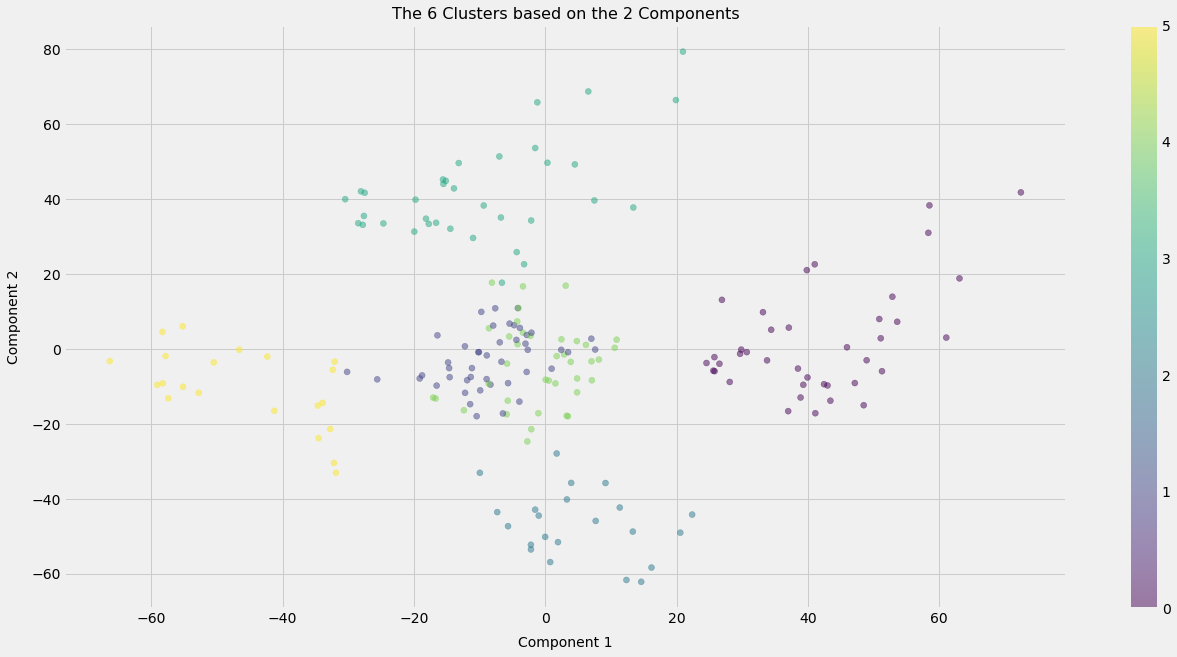

In [96]:
fig, ax = plt.subplots(figsize = (20, 10))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c= y_means, alpha= 0.5)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('The 6 Clusters based on the 2 Components', size=16)


plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
plt.show()

In [97]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centroids.index_name = "Cluster"

centroids["Cluster"] = centroids.index
centroids = centroids.reset_index(drop=True)

centroids

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.538462,32.692308,86.538462,82.128205,0
1,0.555556,56.155556,53.377778,49.088889,1
2,0.590909,25.272727,25.727273,79.363636,2
3,0.428571,41.685714,88.228571,17.285714,3
4,0.657895,27.000000,56.657895,49.131579,4
5,0.619048,44.142857,25.142857,19.523810,5


The most important features appear to be Annual Income and Spending score.  
- We have people whose income is low but spend in the same range - segment 2. 
- People whose earnings a high and spend a lot - segment 0. 
- Customers whose income is middle range but also spend at the same level - segment 1 and 4.  
- Then we have customers whose income is very high but they have most spendings - segment 3. 
- And last, people whose earnings are little but they spend a lot- segment 5.